In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [24]:
x = np.linspace(0,1,300)
y = 0.7*x
noise_y = np.random.normal(0, 0.1, y.shape)
y = y+noise_y

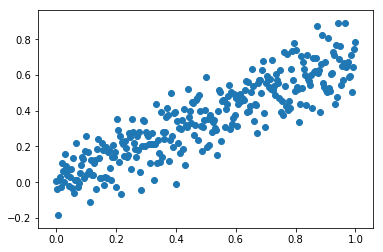

In [25]:
plt.scatter(x,y)

In [26]:
Wts = np.linspace(-5,5, 100)

In [27]:
Wts[0]

-5.0

In [28]:
y_out = Wts[0] * x

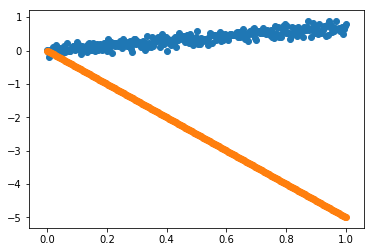

In [29]:
plt.scatter(x,y)
plt.scatter(x, y_out)

In [30]:
m = len(x)
error_val = ((y_out - y)**2).sum()/(2*m)
error_val

5.4461037871474

In [31]:
error_list = []
for W in Wts:
    y_out = W * x
    m = len(x)
    error_val = ((y_out - y)**2).sum()/(2*m)
    error_list.append(error_val)

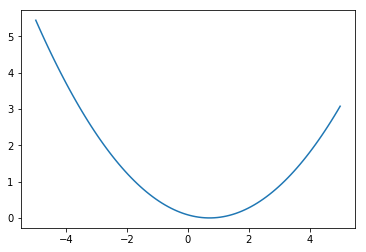

In [32]:
plt.plot(Wts,error_list)

In [33]:
W = -4
y_out = W * x
error_val = ((y_out - y)**2).sum()/(2*len(y))
error_val

3.7069575596092013

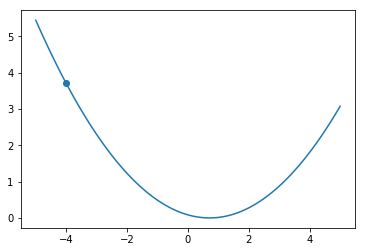

In [34]:
plt.plot(Wts,error_list)
plt.scatter(W, error_val)

In [35]:
m = len(x)
error = y_out - y
dW = (x*error).sum()/ m
dW

-1.5722008540710875

In [36]:
alpha = 1

In [37]:
Wold = W
Eold = error_val
# y = mx+c
# c = y - mx
c_plot = Eold - dW * W
x_plot = np.linspace(Wold-1, Wold+1, 50)
y_plot = dW*x_plot + c_plot
# print(x_plot)

W = W - alpha* dW
W

-2.4277991459289128

In [38]:
y_out = W * x
error_val = ((y_out - y)**2).sum()/(2*len(y))
error_val

1.647800200120737

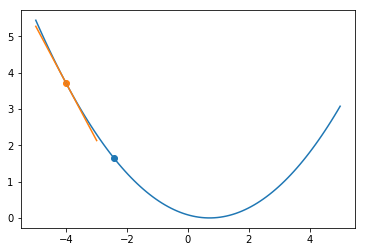

In [39]:
plt.plot(Wts,error_list)
plt.scatter(W, error_val)
plt.scatter(Wold, Eold)
plt.plot(x_plot, y_plot)

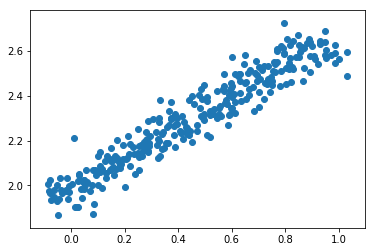

In [40]:
x = np.linspace(0,1,300)
y = 0.7*x + 2
noise_x = np.random.normal(-0.05, 0.05, x.shape)
x = x+noise_x
noise_y = np.random.normal(-0.05, 0.05, y.shape)
y = y+noise_y
plt.scatter(x,y)

In [41]:
Wts = np.linspace(-5,5, 100)
bias = np.linspace(-5,5, 100)
W = Wts[0]
b = bias[0]
y_out = W*x + b

In [42]:
error_list = []
for W in Wts:
    for b in bias:
        y_out = W * x + b
        m = len(x)
        error_val = ((y_out - y)**2).sum()/(2*m)
        error_list.append([W, b, error_val])

In [43]:
from mpl_toolkits.mplot3d import Axes3D

In [45]:
E = np.array(error_list)
E

array([[-5.        , -5.        , 46.94498412],
       [-5.        , -4.8989899 , 45.98650732],
       [-5.        , -4.7979798 , 45.03823356],
       ...,
       [ 5.        ,  4.7979798 , 12.09323407],
       [ 5.        ,  4.8989899 , 12.57750961],
       [ 5.        ,  5.        , 13.0719882 ]])

In [47]:
# E = np.array(error_list)
Ws = E[:, 0]
bs = E[:, 1]
Es = E[:, 2]

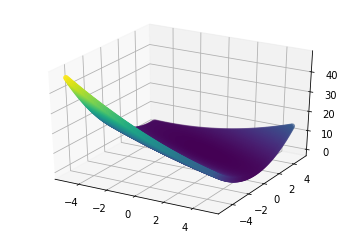

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Ws, bs, Es, c =Es)

In [58]:
#https://www.youtube.com/watch?v=kJgx2RcJKZY